In [256]:
# ===============================
#Yuzheng Liu z5598864
#Xudong Yang z5713177
# ===============================


In [257]:
pip install tensorflow

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try 'pacman -S
    python-xyz', where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Arch-packaged Python package,
    create a virtual environment using 'python -m venv path/to/venv'.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip.
    
    If you wish to install a non-Arch packaged Python application,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. Make sure you have python-pipx
    installed via pacman.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detailed specification.
Note: you may need to restart the kernel to use updated packages.


In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, roc_auc_score, roc_curve
)

sns.set(style="whitegrid", context="notebook")


In [259]:
# Version-agnostic RMSE helper
import numpy as np
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [260]:
import pandas as pd

df = pd.read_csv("abalone.data", header=None, names=[
    "Sex", "Length", "Diameter", "Height",
    "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"
])

df["Sex"] = df["Sex"].map({"M": 1, "F": 0, "I": 0.5})

df = df[df["Height"] > 0].reset_index(drop=True)

print("✅ Data loaded successfully from local file")
print("Shape:", df.shape)
display(df.head())
display(df.describe())



✅ Data loaded successfully from local file
Shape: (4175, 9)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.5,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4175.000000,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.526467,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.411218,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.000000,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.500000,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,1.000000,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,1.000000,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


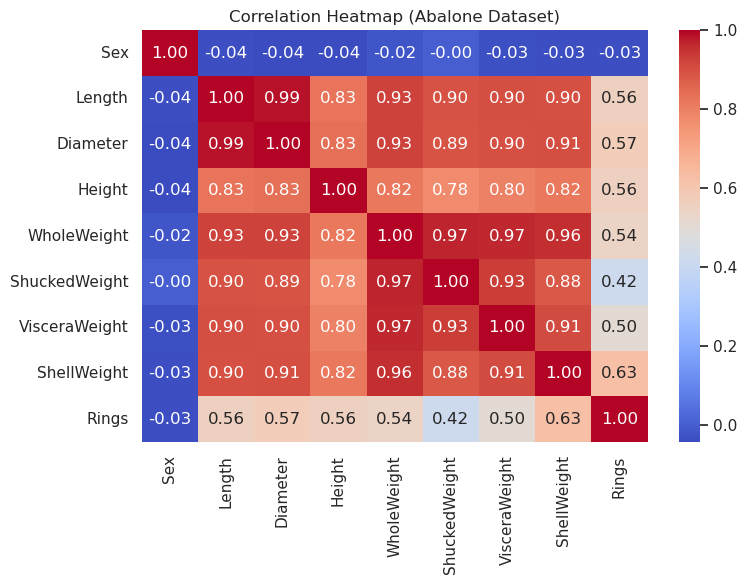

Most positively correlated feature: ShellWeight (0.628)
Most negatively correlated feature: Sex (-0.035)


In [261]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Abalone Dataset)")
plt.tight_layout()
plt.show()

rings_corr = corr["Rings"].drop("Rings")
pos_feature = rings_corr.idxmax()
neg_feature = rings_corr.idxmin()
print(f"Most positively correlated feature: {pos_feature} ({rings_corr[pos_feature]:.3f})")
print(f"Most negatively correlated feature: {neg_feature} ({rings_corr[neg_feature]:.3f})")


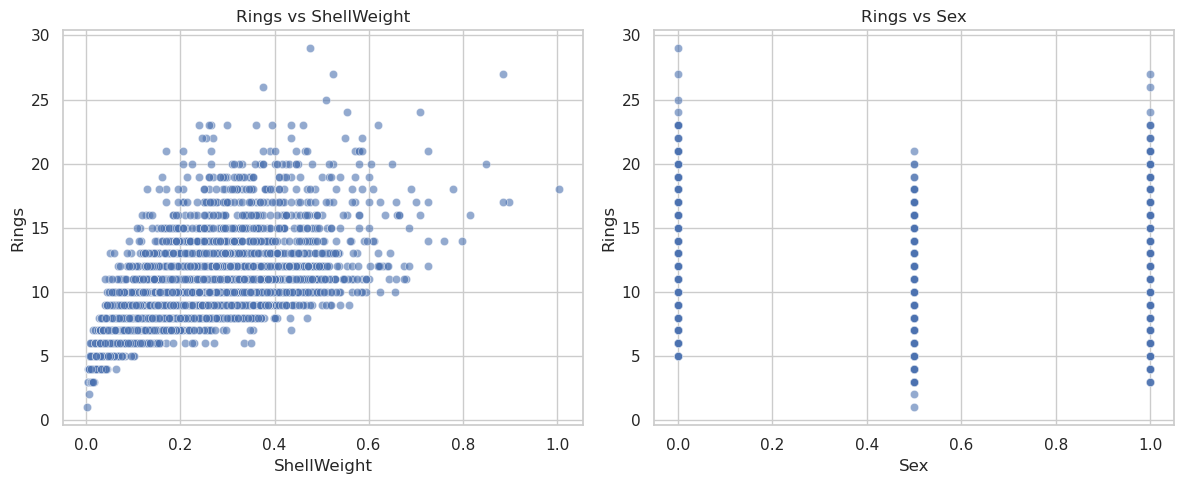

In [262]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(x=df[pos_feature], y=df["Rings"], ax=axs[0], alpha=0.6)
axs[0].set_title(f"Rings vs {pos_feature}")
sns.scatterplot(x=df[neg_feature], y=df["Rings"], ax=axs[1], alpha=0.6)
axs[1].set_title(f"Rings vs {neg_feature}")
plt.tight_layout()
plt.show()


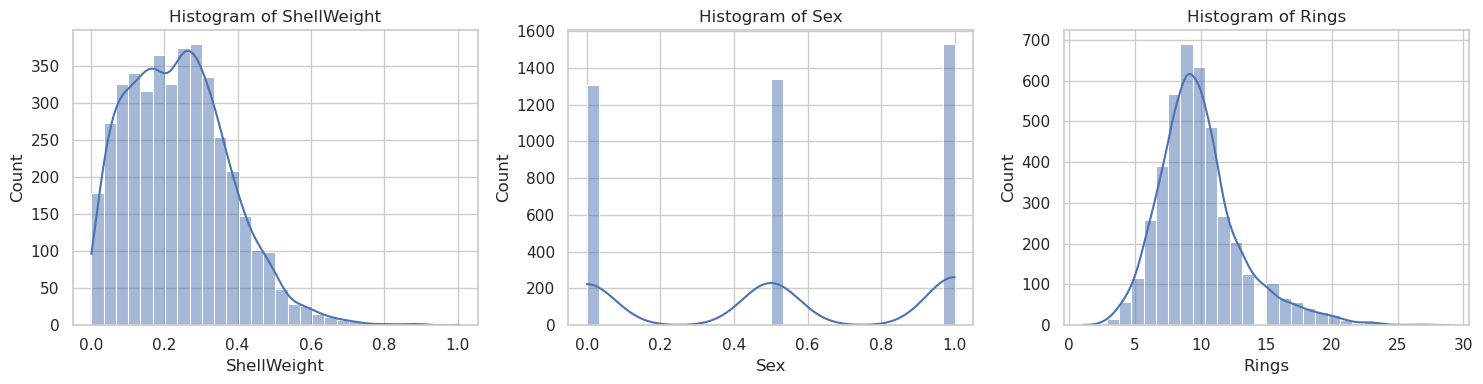

In [263]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
for i, col in enumerate([pos_feature, neg_feature, "Rings"]):
    sns.histplot(df[col], bins=30, kde=True, ax=axs[i])
    axs[i].set_title(f"Histogram of {col}")
plt.tight_layout()
plt.show()


In [264]:
X = df.drop(columns=["Rings"])
y = df["Rings"].astype(float)

exp_seed = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=exp_seed
)

# Classification labels: below 7 vs above 7
y_train_cls = (y_train >= 7).astype(int)
y_test_cls  = (y_test  >= 7).astype(int)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Positive feature:", pos_feature, "| Negative feature:", neg_feature)


Train shape: (2505, 8)
Test shape: (1670, 8)
Positive feature: ShellWeight | Negative feature: Sex


Linear Regression (All Features)
Train RMSE: 2.250, R²: 0.519
Test  RMSE: 2.165, R²: 0.540


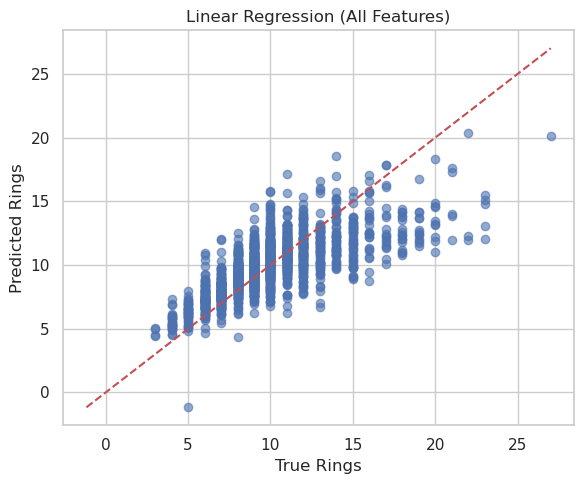

In [265]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

lin_all = LinearRegression().fit(X_train, y_train)
pred_train = lin_all.predict(X_train)
pred_test  = lin_all.predict(X_test)

rmse_train = rmse(y_train, pred_train)
rmse_test  = rmse(y_test, pred_test)
r2_train   = r2_score(y_train, pred_train)
r2_test    = r2_score(y_test, pred_test)

print("Linear Regression (All Features)")
print(f"Train RMSE: {rmse_train:.3f}, R²: {r2_train:.3f}")
print(f"Test  RMSE: {rmse_test:.3f}, R²: {r2_test:.3f}")

plt.figure(figsize=(6,5))
plt.scatter(y_test, pred_test, alpha=0.6)
plt.xlabel("True Rings"); plt.ylabel("Predicted Rings")
plt.title("Linear Regression (All Features)")
lims = [min(y_test.min(), pred_test.min()), max(y_test.max(), pred_test.max())]
plt.plot(lims, lims, "r--")
plt.tight_layout()
plt.show()


Linear Regression (Two Features: ShellWeight, Sex)
Train RMSE: 2.514, R²: 0.400
Test  RMSE: 2.501, R²: 0.386


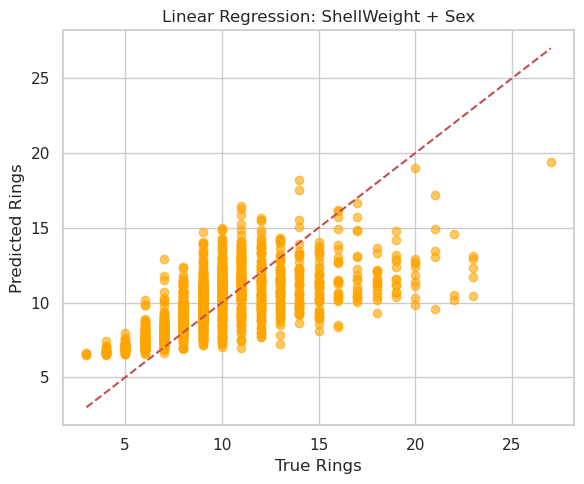

In [266]:

lin_two = LinearRegression().fit(X_train[[pos_feature, neg_feature]], y_train)

pred_train_two = lin_two.predict(X_train[[pos_feature, neg_feature]])
pred_test_two  = lin_two.predict(X_test[[pos_feature, neg_feature]])

rmse_train_two = rmse(y_train, pred_train_two)
rmse_test_two  = rmse(y_test, pred_test_two)
r2_train_two   = r2_score(y_train, pred_train_two)
r2_test_two    = r2_score(y_test, pred_test_two)

print(f"Linear Regression (Two Features: {pos_feature}, {neg_feature})")
print(f"Train RMSE: {rmse_train_two:.3f}, R²: {r2_train_two:.3f}")
print(f"Test  RMSE: {rmse_test_two:.3f}, R²: {r2_test_two:.3f}")

plt.figure(figsize=(6,5))
plt.scatter(y_test, pred_test_two, alpha=0.6, color="orange")
plt.xlabel("True Rings"); plt.ylabel("Predicted Rings")
plt.title(f"Linear Regression: {pos_feature} + {neg_feature}")
lims = [min(y_test.min(), pred_test_two.min()), max(y_test.max(), pred_test_two.max())]
plt.plot(lims, lims, "r--")
plt.tight_layout()
plt.show()


Logistic Regression (All Features, No Scaling) → Accuracy: 0.927, AUC: 0.947


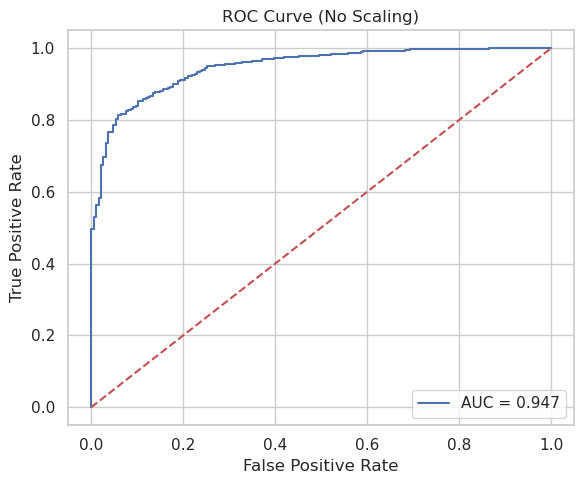

In [267]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train_cls)

y_prob = log_reg.predict_proba(X_test)[:,1]
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test_cls, y_pred)
auc = roc_auc_score(y_test_cls, y_prob)
print(f"Logistic Regression (All Features, No Scaling) → Accuracy: {acc:.3f}, AUC: {auc:.3f}")

fpr, tpr, _ = roc_curve(y_test_cls, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve (No Scaling)")
plt.legend()
plt.tight_layout()
plt.show()


Logistic Regression (MinMax Scaled) → Accuracy: 0.928, AUC: 0.949


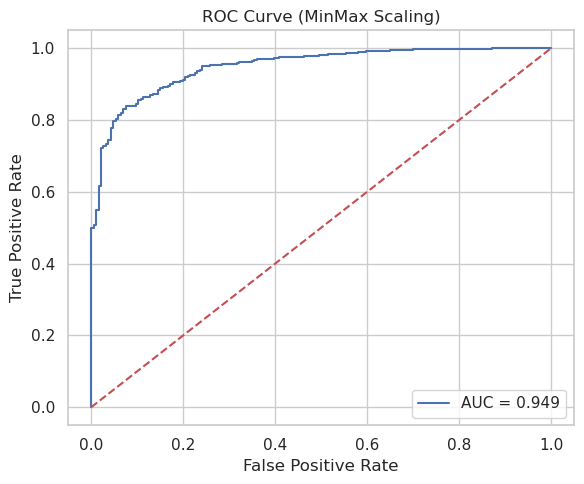

In [268]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

log_reg_s = LogisticRegression(max_iter=2000)
log_reg_s.fit(X_train_scaled, y_train_cls)

y_prob_s = log_reg_s.predict_proba(X_test_scaled)[:,1]
y_pred_s = (y_prob_s >= 0.5).astype(int)

acc_s = accuracy_score(y_test_cls, y_pred_s)
auc_s = roc_auc_score(y_test_cls, y_prob_s)
print(f"Logistic Regression (MinMax Scaled) → Accuracy: {acc_s:.3f}, AUC: {auc_s:.3f}")

fpr_s, tpr_s, _ = roc_curve(y_test_cls, y_prob_s)
plt.figure(figsize=(6,5))
plt.plot(fpr_s, tpr_s, label=f"AUC = {auc_s:.3f}")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve (MinMax Scaling)")
plt.legend()
plt.tight_layout()
plt.show()


Logistic Regression (Two Features: ShellWeight, Sex) → Accuracy: 0.889, AUC: 0.954


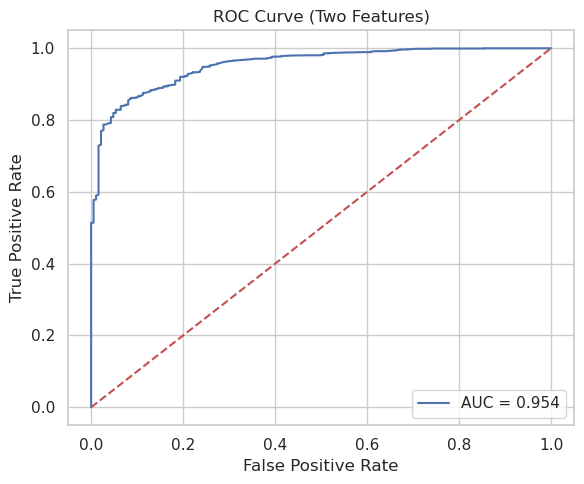

In [269]:
log_two = LogisticRegression(max_iter=2000)
log_two.fit(X_train[[pos_feature, neg_feature]], y_train_cls)

y_prob_two = log_two.predict_proba(X_test[[pos_feature, neg_feature]])[:,1]
y_pred_two = (y_prob_two >= 0.5).astype(int)

acc_two = accuracy_score(y_test_cls, y_pred_two)
auc_two = roc_auc_score(y_test_cls, y_prob_two)
print(f"Logistic Regression (Two Features: {pos_feature}, {neg_feature}) → Accuracy: {acc_two:.3f}, AUC: {auc_two:.3f}")

fpr2, tpr2, _ = roc_curve(y_test_cls, y_prob_two)
plt.figure(figsize=(6,5))
plt.plot(fpr2, tpr2, label=f"AUC = {auc_two:.3f}")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Two Features)")
plt.legend()
plt.tight_layout()
plt.show()


In [270]:
def run_experiments(n_experiments=2, base_seed=42, test_size=0.40):
  results = []
  for i in range(n_experiments):
    seed = base_seed + i
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=test_size, random_state=seed)
    y_tr_cls = (y_tr >= 7).astype(int)
    y_te_cls = (y_te >= 7).astype(int)

    m_all = LinearRegression().fit(X_tr, y_tr)
    p_tr = m_all.predict(X_tr)
    p_te = m_all.predict(X_te)
    reg_all_vals = [rmse(y_tr,p_tr), rmse(y_te,p_te), r2_score(y_tr,p_tr), r2_score(y_te,p_te)]

    m_two = LinearRegression().fit(X_tr[[pos_feature, neg_feature]], y_tr)
    p_tr2 = m_two.predict(X_tr[[pos_feature, neg_feature]])
    p_te2 = m_two.predict(X_te[[pos_feature, neg_feature]])
    reg_two_vals = [rmse(y_tr,p_tr2), rmse(y_te,p_te2), r2_score(y_tr,p_tr2), r2_score(y_te,p_te2)]

    lg_no = LogisticRegression(max_iter=2000).fit(X_tr, y_tr_cls)
    pr_tr_no = lg_no.predict_proba(X_tr)[:,1]
    pr_te_no = lg_no.predict_proba(X_te)[:,1]
    cls_no_vals = [
      accuracy_score(y_tr_cls, (pr_tr_no>=0.5).astype(int)),
      accuracy_score(y_te_cls, (pr_te_no>=0.5).astype(int)),
      roc_auc_score(y_tr_cls, pr_tr_no),
      roc_auc_score(y_te_cls, pr_te_no)
    ]

    sc_all = MinMaxScaler()
    X_trs = sc_all.fit_transform(X_tr)
    X_tes = sc_all.transform(X_te)
    lg_mm = LogisticRegression(max_iter=2000).fit(X_trs, y_tr_cls)
    pr_tr_mm = lg_mm.predict_proba(X_trs)[:,1]
    pr_te_mm = lg_mm.predict_proba(X_tes)[:,1]
    cls_mm_vals = [
      accuracy_score(y_tr_cls, (pr_tr_mm>=0.5).astype(int)),
      accuracy_score(y_te_cls, (pr_te_mm>=0.5).astype(int)),
      roc_auc_score(y_tr_cls, pr_tr_mm),
      roc_auc_score(y_te_cls, pr_te_mm)
    ]

    sc_two = MinMaxScaler()
    X_tr2s = sc_two.fit_transform(X_tr[[pos_feature, neg_feature]])
    X_te2s = sc_two.transform(X_te[[pos_feature, neg_feature]])
    lg_two = LogisticRegression(max_iter=2000).fit(X_tr2s, y_tr_cls)
    pr_tr_two = lg_two.predict_proba(X_tr2s)[:,1]
    pr_te_two = lg_two.predict_proba(X_te2s)[:,1]
    cls_two_vals = [
      accuracy_score(y_tr_cls, (pr_tr_two>=0.5).astype(int)),
      accuracy_score(y_te_cls, (pr_te_two>=0.5).astype(int)),
      roc_auc_score(y_tr_cls, pr_tr_two),
      roc_auc_score(y_te_cls, pr_te_two)
    ]

    reg_table = pd.DataFrame({
      "Model": ["LinearReg (All)", f"LinearReg (Two: {pos_feature}, {neg_feature})"],
      "RMSE_train": [reg_all_vals[0], reg_two_vals[0]],
      "RMSE_test": [reg_all_vals[1], reg_two_vals[1]],
      "R2_train": [reg_all_vals[2], reg_two_vals[2]],
      "R2_test": [reg_all_vals[3], reg_two_vals[3]]
    })
    cls_table = pd.DataFrame({
      "Model": ["LogReg (All, NoNorm)", "LogReg (All, MinMax)", f"LogReg (Two: {pos_feature}, {neg_feature}, MinMax)"],
      "ACC_train": [cls_no_vals[0], cls_mm_vals[0], cls_two_vals[0]],
      "ACC_test": [cls_no_vals[1], cls_mm_vals[1], cls_two_vals[1]],
      "AUC_train": [cls_no_vals[2], cls_mm_vals[2], cls_two_vals[2]],
      "AUC_test": [cls_no_vals[3], cls_mm_vals[3], cls_two_vals[3]]
    })

    display(f"===== Experiment {i+1} =====")
    display(reg_table)
    display(cls_table)

    results.append({
      "Exp": i+1,
      "LinAll_RMSE": reg_all_vals[1],
      "LinTwo_RMSE": reg_two_vals[1],
      "LinAll_R2": reg_all_vals[3],
      "LinTwo_R2": reg_two_vals[3],
      "LogAll_ACC": cls_no_vals[1],
      "LogMM_ACC": cls_mm_vals[1],
      "LogTwo_ACC": cls_two_vals[1],
      "LogAll_AUC": cls_no_vals[3],
      "LogMM_AUC": cls_mm_vals[3],
      "LogTwo_AUC": cls_two_vals[3]
    })
  return pd.DataFrame(results)

RESULTS_DF = run_experiments(2, 42, 0.4)
display(RESULTS_DF)



'===== Experiment 1 ====='

,Model,RMSE_train,RMSE_test,R2_train,R2_test
0,LinearReg (All),2.249541,2.165496,0.519468,0.539583
1,"LinearReg (Two: ShellWeight, Sex)",2.514458,2.500848,0.399624,0.385940


,Model,ACC_train,ACC_test,AUC_train,AUC_test
0,"LogReg (All, NoNorm)",0.940918,0.926946,0.951819,0.947342
1,"LogReg (All, MinMax)",0.941317,0.927545,0.952792,0.948602
2,"LogReg (Two: ShellWeight, Sex, MinMax)",0.895808,0.888623,0.956327,0.954151


'===== Experiment 2 ====='

,Model,RMSE_train,RMSE_test,R2_train,R2_test
0,LinearReg (All),2.238877,2.186693,0.539499,0.504690
1,"LinearReg (Two: ShellWeight, Sex)",2.530163,2.480270,0.411878,0.362766


,Model,ACC_train,ACC_test,AUC_train,AUC_test
0,"LogReg (All, NoNorm)",0.933333,0.932934,0.950258,0.949900
1,"LogReg (All, MinMax)",0.933333,0.935329,0.951331,0.951244
2,"LogReg (Two: ShellWeight, Sex, MinMax)",0.907385,0.911377,0.956449,0.954850


,Exp,LinAll_RMSE,LinTwo_RMSE,LinAll_R2,LinTwo_R2,LogAll_ACC,LogMM_ACC,LogTwo_ACC,LogAll_AUC,LogMM_AUC,LogTwo_AUC
0,1,2.165496,2.500848,0.539583,0.385940,0.926946,0.927545,0.888623,0.947342,0.948602,0.954151
1,2,2.186693,2.480270,0.504690,0.362766,0.932934,0.935329,0.911377,0.949900,0.951244,0.954850


In [271]:
try:
  import tensorflow as tf
  from tensorflow.keras import Sequential
  from tensorflow.keras.layers import Dense, Input
  from tensorflow.keras.optimizers import SGD
  KERAS_OK = True
except Exception as e:
  print("Keras/TensorFlow not available:", repr(e))
  KERAS_OK = False

def build_reg_nn(input_dim, hidden=32, layers=1, lr=0.01):
  model = Sequential([Input(shape=(input_dim,))])
  for _ in range(layers):
    model.add(Dense(hidden, activation="relu"))
  model.add(Dense(1, activation="linear"))
  model.compile(optimizer=SGD(learning_rate=lr), loss="mse")
  return model

def build_cls_nn(input_dim, hidden=32, layers=1, lr=0.01):
  model = Sequential([Input(shape=(input_dim,))])
  for _ in range(layers):
    model.add(Dense(hidden, activation="relu"))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(optimizer=SGD(learning_rate=lr), loss="binary_crossentropy")
  return model

def run_nn_experiments(n_experiments=2, base_seed=42, epochs=120, batch_size=64, hidden=32, layers=1, lr=0.01):
  reg_stats, cls_stats, rows = [], [], []
  for i in range(n_experiments):
    seed = base_seed + i
    tf.keras.utils.set_random_seed(seed)
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.40, random_state=seed)
    y_tr_cls = (y_tr >= 7).astype(int)
    y_te_cls = (y_te >= 7).astype(int)
    sc = MinMaxScaler()
    X_trs = sc.fit_transform(X_tr)
    X_tes = sc.transform(X_te)

    reg = build_reg_nn(X_trs.shape[1], hidden=hidden, layers=layers, lr=lr)
    reg.fit(X_trs, y_tr, epochs=epochs, batch_size=batch_size, verbose=0)
    p_tr = reg.predict(X_trs, verbose=0).ravel()
    p_te = reg.predict(X_tes, verbose=0).ravel()
    reg_vals = [rmse(y_tr,p_tr), rmse(y_te,p_te), r2_score(y_tr,p_tr), r2_score(y_te,p_te)]
    reg_stats.append(reg_vals)

    cls = build_cls_nn(X_trs.shape[1], hidden=hidden, layers=layers, lr=lr)
    cls.fit(X_trs, y_tr_cls, epochs=epochs, batch_size=batch_size, verbose=0)
    pr_tr = cls.predict(X_trs, verbose=0).ravel()
    pr_te = cls.predict(X_tes, verbose=0).ravel()
    cls_vals = [
      accuracy_score(y_tr_cls, (pr_tr>=0.5).astype(int)),
      accuracy_score(y_te_cls, (pr_te>=0.5).astype(int)),
      roc_auc_score(y_tr_cls, pr_tr),
      roc_auc_score(y_te_cls, pr_te)
    ]
    cls_stats.append(cls_vals)

    reg_table = pd.DataFrame({
      "Model":[f"NN-Reg (h{hidden}x{layers}, lr={lr})"],
      "RMSE_train":[reg_vals[0]],
      "RMSE_test":[reg_vals[1]],
      "R2_train":[reg_vals[2]],
      "R2_test":[reg_vals[3]],
    })
    cls_table = pd.DataFrame({
      "Model":[f"NN-Cls (h{hidden}x{layers}, lr={lr})"],
      "ACC_train":[cls_vals[0]],
      "ACC_test":[cls_vals[1]],
      "AUC_train":[cls_vals[2]],
      "AUC_test":[cls_vals[3]],
    })

    display(f"===== NN Experiment {i+1} =====")
    display(reg_table)
    display(cls_table)

    rows.append({
      "Exp": i+1,
      "NN_Reg_RMSE_tr": reg_vals[0],
      "NN_Reg_RMSE_te": reg_vals[1],
      "NN_Reg_R2_tr": reg_vals[2],
      "NN_Reg_R2_te": reg_vals[3],
      "NN_Cls_ACC_tr": cls_vals[0],
      "NN_Cls_ACC_te": cls_vals[1],
      "NN_Cls_AUC_tr": cls_vals[2],
      "NN_Cls_AUC_te": cls_vals[3],
    })

  a = np.array(reg_stats)
  b = np.array(cls_stats)
  nn_reg_table = pd.DataFrame({
    "Model":[f"NN-Reg (SGD, h{hidden}x{layers}, lr={lr})"],
    "RMSE_train_mean":[a[:,0].mean()], "RMSE_train_std":[a[:,0].std()],
    "RMSE_test_mean":[a[:,1].mean()],  "RMSE_test_std":[a[:,1].std()],
    "R2_train_mean":[a[:,2].mean()],   "R2_train_std":[a[:,2].std()],
    "R2_test_mean":[a[:,3].mean()],    "R2_test_std":[a[:,3].std()],
  })
  nn_cls_table = pd.DataFrame({
    "Model":[f"NN-Cls (SGD, h{hidden}x{layers}, lr={lr})"],
    "ACC_train_mean":[b[:,0].mean()], "ACC_train_std":[b[:,0].std()],
    "ACC_test_mean":[b[:,1].mean()],  "ACC_test_std":[b[:,1].std()],
    "AUC_train_mean":[b[:,2].mean()], "AUC_train_std":[b[:,2].std()],
    "AUC_test_mean":[b[:,3].mean()],  "AUC_test_std":[b[:,3].std()],
  })
  results_df = pd.DataFrame(rows)
  return nn_reg_table, nn_cls_table, results_df

if KERAS_OK:
  NN_REG_SUM, NN_CLS_SUM, NN_RESULTS = run_nn_experiments(
    n_experiments=2, base_seed=42, epochs=120, batch_size=64, hidden=32, layers=1, lr=0.01
  )
  display(NN_REG_SUM)
  display(NN_CLS_SUM)
  display(NN_RESULTS.head())
else:
  print("NN section skipped (TensorFlow/Keras not available).")


'===== NN Experiment 1 ====='

,Model,RMSE_train,RMSE_test,R2_train,R2_test
0,"NN-Reg (h32x1, lr=0.01)",2.215458,2.123373,0.533919,0.557321


,Model,ACC_train,ACC_test,AUC_train,AUC_test
0,"NN-Cls (h32x1, lr=0.01)",0.922954,0.916168,0.95221,0.944117


'===== NN Experiment 2 ====='

,Model,RMSE_train,RMSE_test,R2_train,R2_test
0,"NN-Reg (h32x1, lr=0.01)",2.201302,2.142738,0.554826,0.524403


,Model,ACC_train,ACC_test,AUC_train,AUC_test
0,"NN-Cls (h32x1, lr=0.01)",0.926946,0.928144,0.946746,0.950352


,Model,RMSE_train_mean,RMSE_train_std,RMSE_test_mean,RMSE_test_std,R2_train_mean,R2_train_std,R2_test_mean,R2_test_std
0,"NN-Reg (SGD, h32x1, lr=0.01)",2.20838,0.007078,2.133056,0.009682,0.544372,0.010454,0.540862,0.016459


,Model,ACC_train_mean,ACC_train_std,ACC_test_mean,ACC_test_std,AUC_train_mean,AUC_train_std,AUC_test_mean,AUC_test_std
0,"NN-Cls (SGD, h32x1, lr=0.01)",0.92495,0.001996,0.922156,0.005988,0.949478,0.002732,0.947234,0.003117


,Exp,NN_Reg_RMSE_tr,NN_Reg_RMSE_te,NN_Reg_R2_tr,NN_Reg_R2_te,NN_Cls_ACC_tr,NN_Cls_ACC_te,NN_Cls_AUC_tr,NN_Cls_AUC_te
0,1,2.215458,2.123373,0.533919,0.557321,0.922954,0.916168,0.952210,0.944117
1,2,2.201302,2.142738,0.554826,0.524403,0.926946,0.928144,0.946746,0.950352


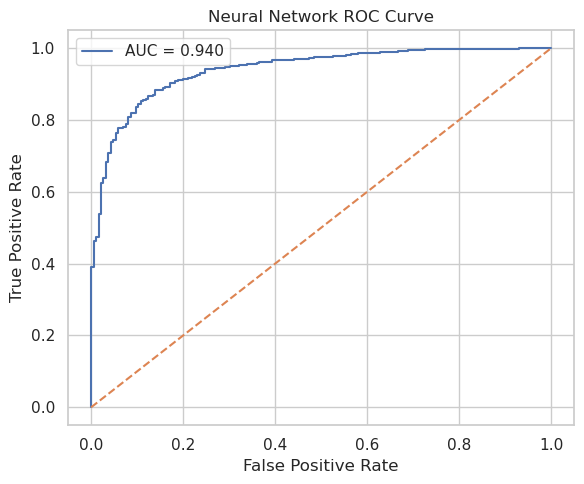

In [272]:
def plot_nn_roc(X, y, threshold=7, test_size=0.40, seed=42,
                epochs=120, batch_size=64, hidden=32, layers=1, lr=0.01):
  y_cls = (y >= threshold).astype(int)
  X_tr, X_te, y_tr, y_te = train_test_split(X, y_cls, test_size=test_size, random_state=seed)

  sc = MinMaxScaler()
  X_trs = sc.fit_transform(X_tr)
  X_tes = sc.transform(X_te)

  model = build_cls_nn(X_trs.shape[1], hidden=hidden, layers=layers, lr=lr)
  model.fit(X_trs, y_tr, epochs=epochs, batch_size=batch_size, verbose=0)

  pr_te = model.predict(X_tes, verbose=0).ravel()
  fpr, tpr, _ = roc_curve(y_te, pr_te)
  auc_val = roc_auc_score(y_te, pr_te)

  plt.figure(figsize=(6,5))
  plt.plot(fpr, tpr, label=f"AUC = {auc_val:.3f}")
  plt.plot([0,1],[0,1],'--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Neural Network ROC Curve")
  plt.legend()
  plt.tight_layout()
  plt.show()


plot_nn_roc(X, y)